In [1]:
pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/DST68'
print(os.listdir(data_path))

['val-20250924T074816Z-1-001.zip', 'test-20250924T074809Z-1-001.zip', 'train-20250924T074809Z-1-001.zip', 'val', 'test', 'train']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

val-20250924T074816Z-1-001.zip
test-20250924T074809Z-1-001.zip
train-20250924T074809Z-1-001.zip
val
test
train


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [8]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000136_5000.wav',
 'a_00000129_0.wav',
 'a_00000136_0.wav',
 'a_00000132_5000.wav',
 'a_00000137_5000.wav',
 'a_00000132_0.wav',
 'a_00000134_5000.wav',
 'a_00000131_5000.wav',
 'a_00000135_0.wav',
 'a_00000131_0.wav',
 'a_00000130_0.wav',
 'a_00000133_5000.wav',
 'a_00000126_0.wav',
 'a_00000128_5000.wav',
 'a_00000128_0.wav',
 'a_00000134_0.wav',
 'a_00000127_5000.wav',
 'a_00000127_0.wav',
 'a_00000123_0.wav',
 'a_00000119_5000.wav',
 'a_00000121_5000.wav',
 'a_00000117_0.wav',
 'a_00000119_0.wav',
 'a_00000116_5000.wav',
 'a_00000121_0.wav',
 'a_00000122_0.wav',
 'a_00000118_0.wav',
 'a_00000118_5000.wav',
 'a_00000110_0.wav',
 'a_00000113_0.wav',
 'a_00000114_5000.wav',
 'a_00000113_5000.wav',
 'a_00000111_5000.wav',
 'a_00000111_0.wav',
 'a_00000115_0.wav',
 'a_00000112_5000.wav',
 'a_00000109_0.wav',
 'a_00000112_0.wav',
 'a_00000106_0.wav',
 'a_00000103_0.wav',
 'a_00000110_5000.wav',
 'a_00000109_5000.wav',
 'a_00000103_5000.wav',
 'a_00000102_0.wav',
 'a_00000107_5000.w

In [9]:
import zipfile

for filename in filelist:
    if filename.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(data_path, filename), 'r') as zip_ref:
            zip_ref.extractall(data_path)

In [10]:
train_data = os.path.join(data_path, "train")
os.listdir(train_data)

['a_00000136_5000.wav',
 'a_00000129_0.wav',
 'a_00000136_0.wav',
 'a_00000132_5000.wav',
 'a_00000137_5000.wav',
 'a_00000132_0.wav',
 'a_00000134_5000.wav',
 'a_00000131_5000.wav',
 'a_00000135_0.wav',
 'a_00000131_0.wav',
 'a_00000130_0.wav',
 'a_00000133_5000.wav',
 'a_00000126_0.wav',
 'a_00000128_5000.wav',
 'a_00000128_0.wav',
 'a_00000134_0.wav',
 'a_00000127_5000.wav',
 'a_00000127_0.wav',
 'a_00000123_0.wav',
 'a_00000119_5000.wav',
 'a_00000121_5000.wav',
 'a_00000117_0.wav',
 'a_00000119_0.wav',
 'a_00000116_5000.wav',
 'a_00000121_0.wav',
 'a_00000122_0.wav',
 'a_00000118_0.wav',
 'a_00000118_5000.wav',
 'a_00000110_0.wav',
 'a_00000113_0.wav',
 'a_00000114_5000.wav',
 'a_00000113_5000.wav',
 'a_00000111_5000.wav',
 'a_00000111_0.wav',
 'a_00000115_0.wav',
 'a_00000112_5000.wav',
 'a_00000109_0.wav',
 'a_00000112_0.wav',
 'a_00000106_0.wav',
 'a_00000103_0.wav',
 'a_00000110_5000.wav',
 'a_00000109_5000.wav',
 'a_00000103_5000.wav',
 'a_00000102_0.wav',
 'a_00000107_5000.w

In [11]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000064_5000.wav',
 'a_00000106_5000.wav',
 'a_00000135_5000.wav',
 'a_00000088_0.wav',
 'a_00000045_0.wav',
 'a_00000115_5000.wav',
 'a_00000036_0.wav',
 'a_00000062_0.wav',
 'a_00000042_5000.wav',
 'a_00000082_0.wav',
 'a_00000096_5000.wav',
 'a_00000072_0.wav',
 'a_00000053_0.wav',
 'a_00000114_0.wav',
 'a_00000058_0.wav',
 'a_00000041_5000.wav',
 'a_00000063_0.wav',
 'a_00000093_5000.wav',
 'a_00000125_0.wav',
 'a_00000104_5000.wav',
 'a_00000102_5000.wav',
 'a_00000120_0.wav',
 'a_00000074_5000.wav',
 'a_00000117_5000.wav',
 'a_00000123_5000.wav',
 'a_00000130_5000.wav',
 'a_00000079_0.wav',
 'a_00000100_5000.wav',
 'a_00000032_5000.wav',
 'a_00000031_5000.wav',
 'a_00000035_5000.wav',
 'a_00000022_0.wav',
 'a_00000024_0.wav',
 'a_00000129_5000.wav',
 'a_00000028_5000.wav',
 'a_00000116_0.wav',
 'a_00000018_5000.wav',
 'a_00000016_0.wav',
 'a_00000012_0.wav',
 'a_00000031_0.wav',
 'a_00000013_5000.wav',
 'a_00000008_5000.wav',
 'a_00000007_0.wav',
 'a_00000010_0.wav',
 'a_000

In [12]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000068_0.wav',
 'a_00000099_0.wav',
 'a_00000080_0.wav',
 'a_00000067_5000.wav',
 'a_00000076_0.wav',
 'a_00000094_5000.wav',
 'a_00000125_5000.wav',
 'a_00000124_5000.wav',
 'a_00000075_0.wav',
 'a_00000122_5000.wav',
 'a_00000105_0.wav',
 'a_00000090_0.wav',
 'a_00000101_0.wav',
 'a_00000100_0.wav',
 'a_00000126_5000.wav',
 'a_00000074_0.wav',
 'a_00000137_0.wav',
 'a_00000088_5000.wav',
 'a_00000124_0.wav',
 'a_00000133_0.wav',
 'a_00000091_0.wav',
 'a_00000087_0.wav',
 'a_00000078_5000.wav',
 'a_00000085_5000.wav',
 'a_00000077_0.wav',
 'a_00000083_0.wav',
 'a_00000099_5000.wav',
 'a_00000066_0.wav',
 'a_00000057_5000.wav',
 'a_00000065_0.wav',
 'a_00000055_5000.wav',
 'a_00000073_0.wav',
 'a_00000053_5000.wav',
 'a_00000043_0.wav',
 'a_00000052_0.wav',
 'a_00000038_0.wav',
 'a_00000035_0.wav',
 'a_00000030_5000.wav',
 'a_00000033_0.wav',
 'a_00000098_0.wav',
 'a_00000027_0.wav',
 'a_00000026_5000.wav',
 'a_00000025_5000.wav',
 'a_00000011_0.wav',
 'a_00000023_5000.wav',
 'a_

In [13]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [14]:
normal_train

'/content/drive/MyDrive/DST68/train/n_*.wav'

In [15]:

normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [16]:
import librosa
import librosa.display

In [17]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [18]:

print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [19]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [20]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [21]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [22]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [23]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [24]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [25]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

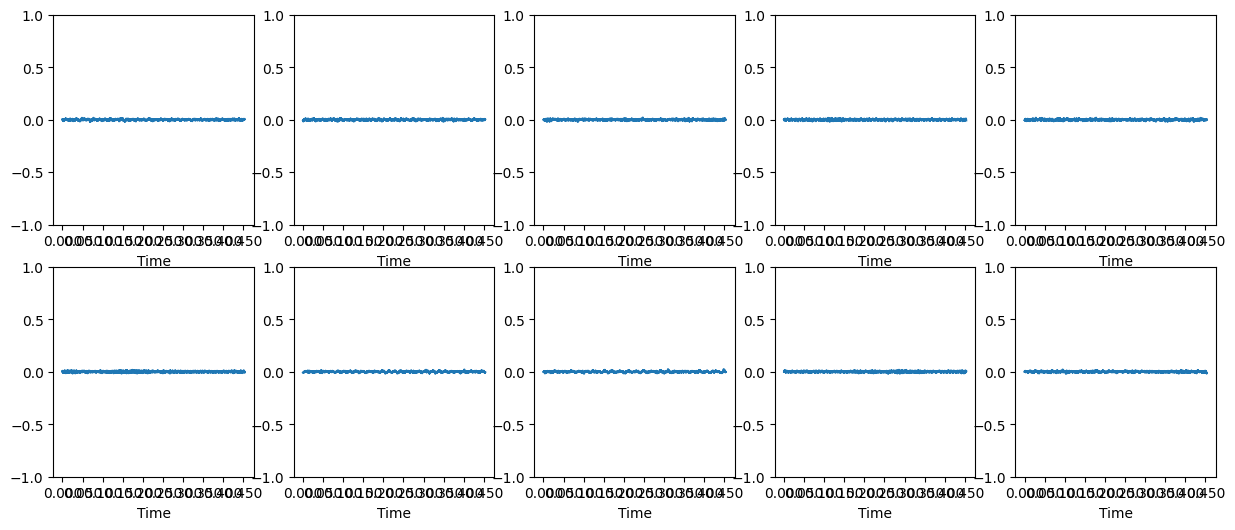

In [26]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

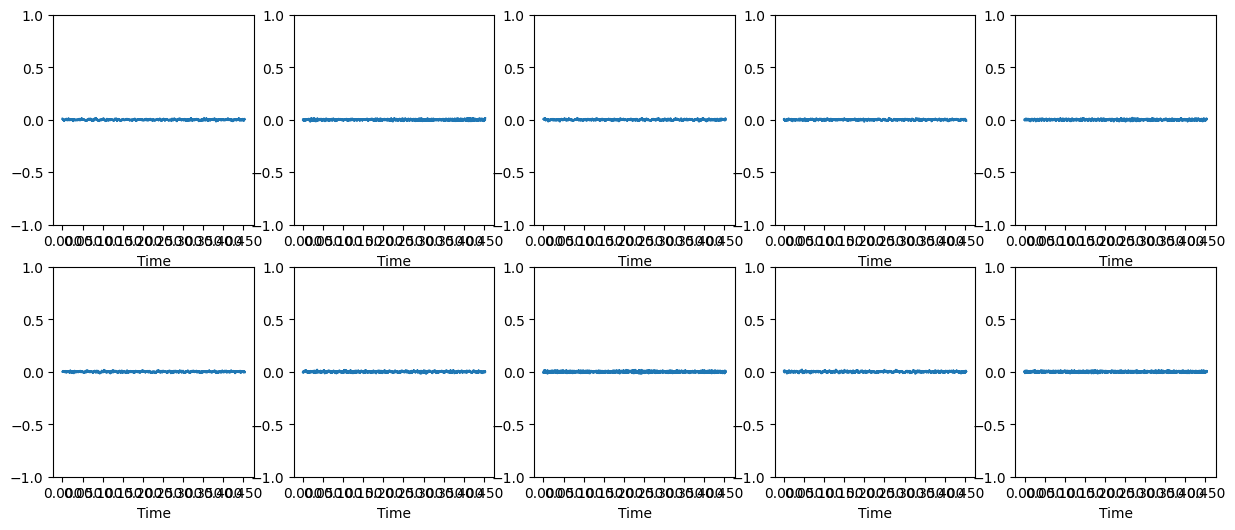

In [27]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [28]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [29]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [30]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [31]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [32]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.58984375e-02 1.92103925e+03]
[2.92968750e-02 1.27215268e+03]
[6.93359375e-02 2.27310706e+03]
[2.24609375e-02 1.47458235e+03]


Text(0, 0.5, 'Count')

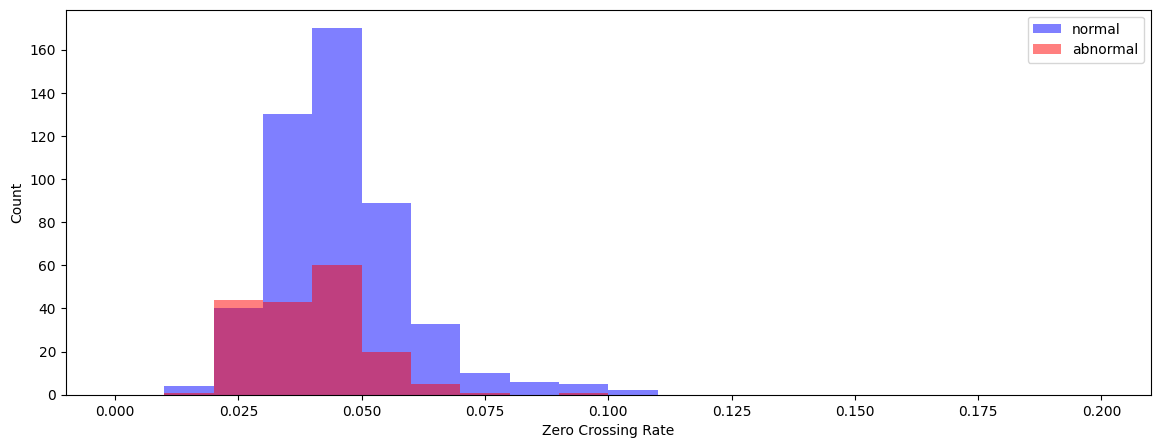

In [33]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

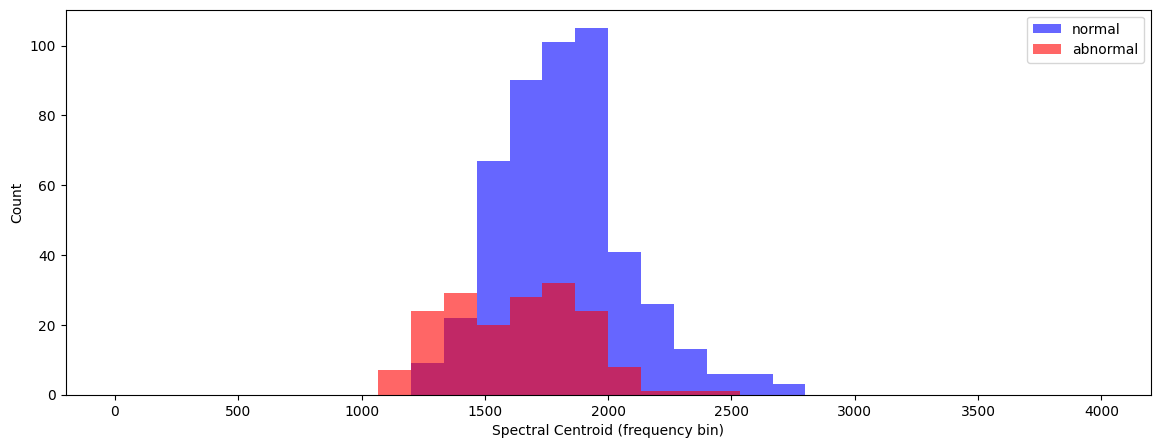

In [34]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [35]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [36]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [37]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [38]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

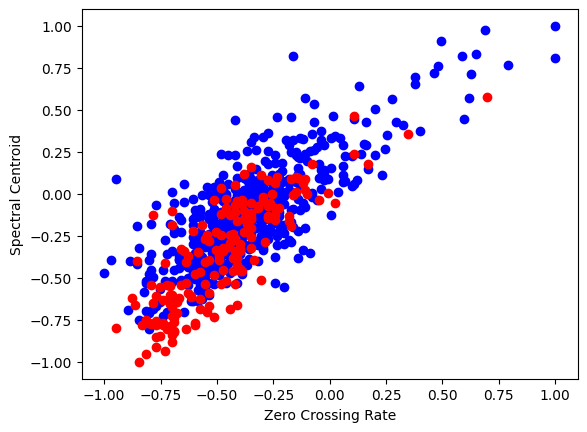

In [39]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [40]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [41]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [42]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [43]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [44]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [45]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [47]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [48]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3957 - loss: 0.7388 - val_accuracy: 0.4277 - val_loss: 0.6982
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6156 - loss: 0.6835 - val_accuracy: 0.7410 - val_loss: 0.6560
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7125 - loss: 0.6472 - val_accuracy: 0.7169 - val_loss: 0.6320
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7361 - loss: 0.6203 - val_accuracy: 0.7169 - val_loss: 0.6183
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7064 - loss: 0.6311 - val_accuracy: 0.7169 - val_loss: 0.6107
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7635 - loss: 0.5889 - val_accuracy: 0.7169 - val_loss: 0.6044
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7521 - loss: 0.5883 - val_accuracy: 0.7169 - val_loss: 0.5999
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6869 - loss: 0.6344 - val_accu

In [50]:
import plotly
import plotly.graph_objs as go

In [51]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [52]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [54]:
file_name = '/content/drive/MyDrive/DST68/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


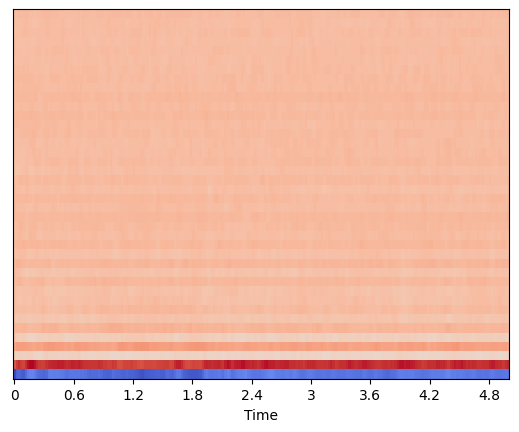

In [55]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

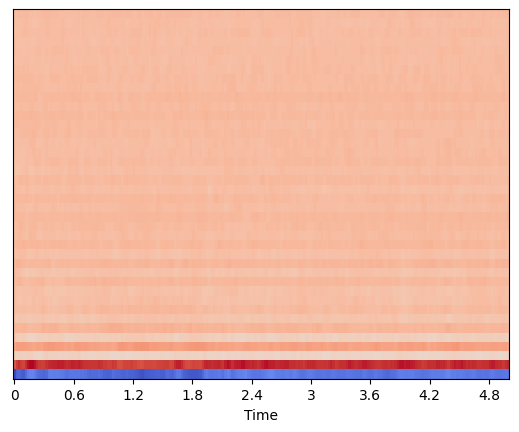

In [56]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [57]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [58]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [59]:
normal_train_features[0].shape

(40, 216)

In [72]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [71]:
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [67]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

In [66]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [74]:
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [75]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

normal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_test)
]

abnormal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_test)
]

normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [70]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [76]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [77]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [78]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [79]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [80]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [81]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [82]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [83]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [84]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [85]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [86]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [88]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6123 - loss: 10.8822
Epoch 1: val_loss improved from inf to 1.78189, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 609ms/step - accuracy: 0.6121 - loss: 10.6807 - val_accuracy: 0.2831 - val_loss: 1.7819
Epoch 2/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6165 - loss: 1.7369
Epoch 2: val_loss improved from 1.78189 to 0.55863, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6594 - loss: 2.0108 - val_accuracy: 0.7289 - val_loss: 0.5586
Epoch 3/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5812 - loss: 1.1269
Epoch 3: val_loss improved from 0.55863 to 0.44457, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6080 - loss: 1.0827 - val_accuracy: 0.7530 - val_loss: 0.4446
Epoch 4/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7890 - loss: 0.6853
Epoch 4: val_loss improved from 0.44457 to 0.41897, savi

In [89]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [90]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [91]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [92]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1865, acc: 0.9563
Validation- loss: 0.2011, acc: 0.9398


In [93]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [94]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 10  37]]


In [95]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9225    1.0000    0.9597       119
    abnormal     1.0000    0.7872    0.8810        47

    accuracy                         0.9398       166
   macro avg     0.9612    0.8936    0.9203       166
weighted avg     0.9444    0.9398    0.9374       166



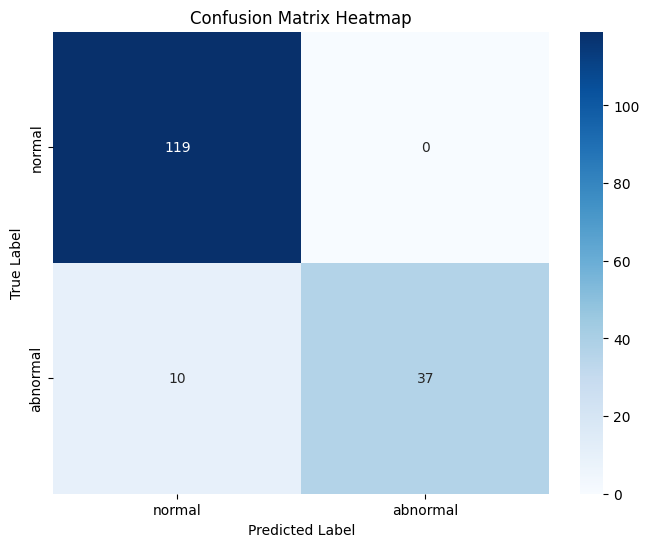

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [97]:
test_data = os.path.join(data_path, "test")

In [98]:
import glob
normal_test = os.path.join(test_data, "n_*.wav")
abnormal_test = os.path.join(test_data, "a_*.wav")

normal_test_signals   = [librosa.load(f)[0] for f in glob.glob(normal_test)]
abnormal_test_signals = [librosa.load(f)[0] for f in glob.glob(abnormal_test)]

In [99]:
normal_test_features   = [extract_features(f) for f in glob.glob(normal_test)]
abnormal_test_features = [extract_features(f) for f in glob.glob(abnormal_test)]

In [100]:
import numpy as np
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
feature_test_table = feature_test_table.reshape(
    feature_test_table.shape[0],
    feature_test_table.shape[1],
    feature_test_table.shape[2],
    1
)
x_test = feature_test_table

In [101]:
from tensorflow.keras.utils import to_categorical
y_test_labels = [0]*len(normal_test_features) + [1]*len(abnormal_test_features)
y_test = to_categorical(y_test_labels)

In [102]:
test_res = model.evaluate(x_test, y_test, verbose=1, return_dict=True)
print(f"Test  - loss: {test_res['loss']:.4f}, acc: {test_res['accuracy']:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.9812 - loss: 0.1656
Test  - loss: 0.1669, acc: 0.9615


In [103]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_cl = np.argmax(y_pred, axis=1)
y_true_cl = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_cl, y_pred_cl)
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
[[153   1]
 [  7  47]]
